# Comparison of criteria between the impulsive and the continuous model with exogenous mortality on pests and interpretation

This notebook compares the efficiency of two different models (continuous and impulsive) with exogenous mortality on pests $x$. Interpretations on the different plots are also given.   
The main criteria of comparison is the time for $x$ to reach an $\epsilon$ value starting from the same value. This time is called $t_{\eta}$. We want to see how does it variate with respect to $T$ (the time period) and $t_{pulse}$ (the time of the first exogenous mortality event).

In [43]:
#Import librairies
import numpy as np
import matplotlib.pyplot as plt

#Import the module and make it reload each time there is a change 
import importlib
import double_exo
importlib.reload(double_exo)

<module 'double_exo' from '/run/netsop/u/home-sam/home/aloyens/Internship_CACOLAC/sim_models/First_sim_CACOLAC/double_exo.py'>

### The models used in this code

#### Continuous model

\begin{cases}
\dot{x} = [r(1-\frac{x}{K})y- E_x]x- axy\\ 
\dot{y} = \gamma axy - my\\
x(nT^{+}) = x(nT) - E_x \times 0\\
y(nT^{+}) = y(nT) - E_y \times 0\\
\end{cases} 

#### Impulsive model

\begin{cases}
    \dot{x} = [r(1-\frac{x}{K})y- E_x]x- axy\\ 
    \dot{y} = \gamma axy - my\\
    x(nT^{+}) = x(nT) - (1 - e^{-E_xT})x(nT)\\
    y(nT^{+}) = y(nT) - E_y \times 0
\end{cases}

Fixed parameters that will be used along the code. 

In [2]:
r = 0.5
K = 10 
a = 0.1
m = 0.1
gamma = 0.8

E_inf = r - 0.1 # E < r
E_sup = r + 0.1 # E > r
T = 5

t_0 = 0
t_n = 100

tt = 1 #just to not have a missing argument t when we solve models

# 1 Presence of pests $x$ only (one dimension)

The models in one dimension (both the continuous and the impulsive) are given by the models in two dimensions with $y_0 = 0$.

The initial value is the same for bith model, which is the "worst possible case": $(x_0,y_0) = (K,0)$

## 1.1 Plot the population

The cell(s) of this section is (are) to visualize the dynamics of the population for the two models. It is possible to change the time of first impulsion $t_{pulse}$.

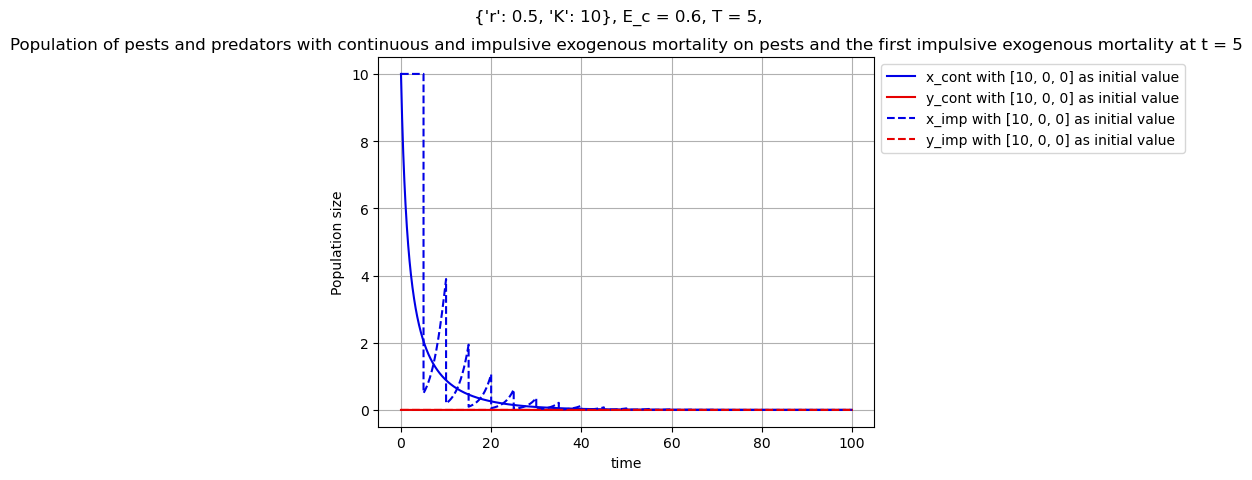

{'T': 5,
 'I_cont_final': 35.83443279398012,
 'I_imp_final': 67.63280876199002,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': 51.25,
 't_eta_imp': 65.0,
 't_eta_imp - t_eta_cont': 13.75}

In [3]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps=0.01,
    plot_population=True
)

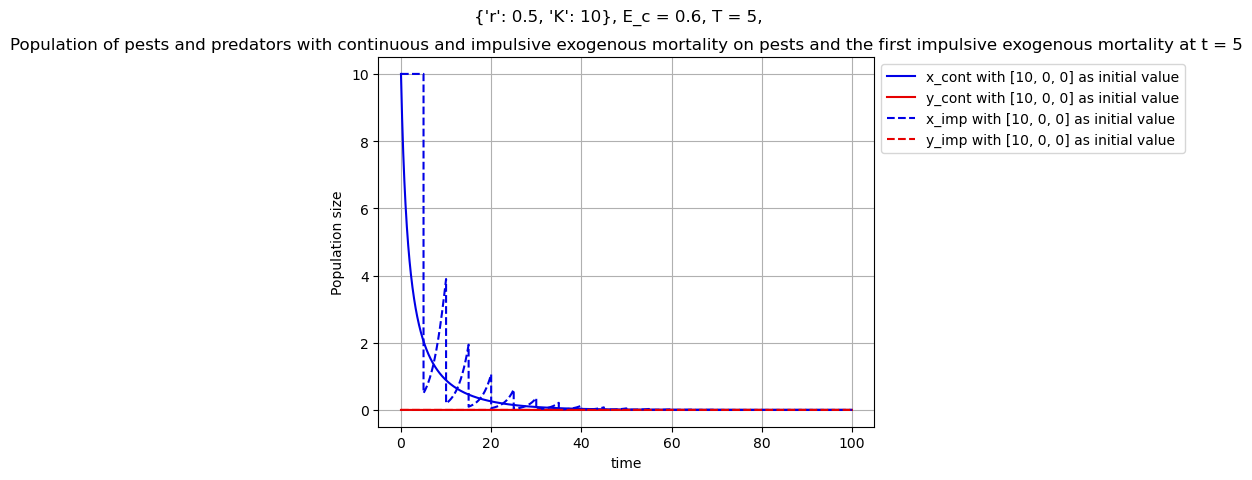

{'T': 5,
 'I_cont_final': 35.83443279398012,
 'I_imp_final': 67.63280876199002,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': 51.25,
 't_eta_imp': 65.0,
 't_eta_imp - t_eta_cont': 13.75}

In [4]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps=0.01,
    plot_population=True
)

## 1.2 Comparison graph : $t_{\eta}$ with respect to $\epsilon$

The parameter $t_{pulse}$ can be changed

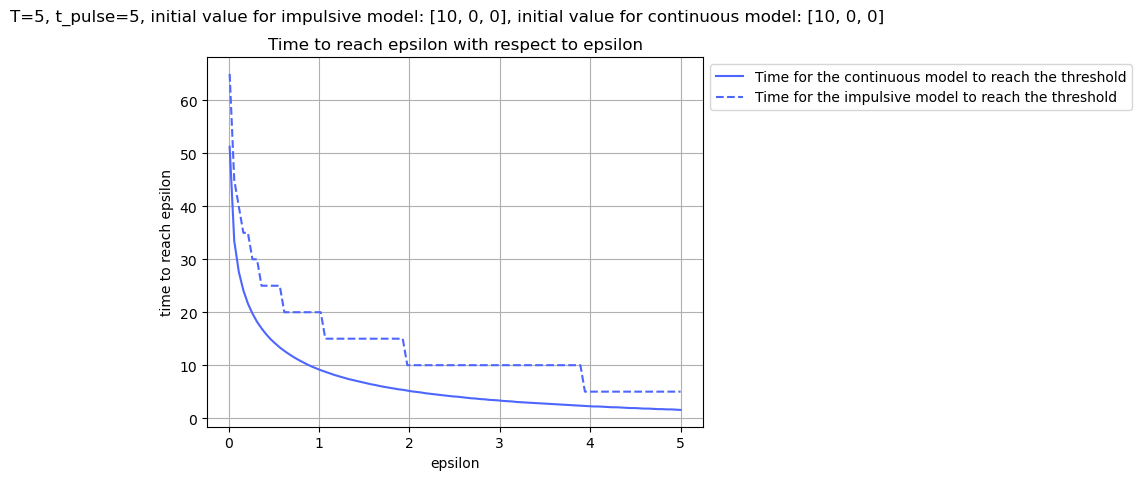

In [5]:
double_exo.plot_t_eta_of_eps_prop_mortality_on_x(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps_start=0.01,
    eps_stop=5
)

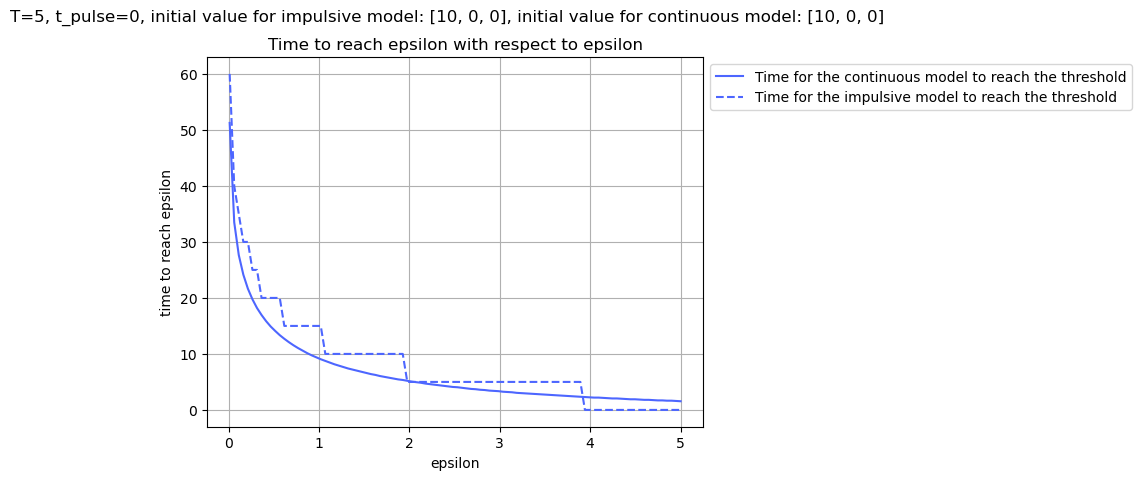

In [6]:
double_exo.plot_t_eta_of_eps_prop_mortality_on_x(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=0,
    eps_start=0.01,
    eps_stop=5
)

(To be reformulated better):  
In the absence of predators and at $x_0 = K$, the time to reach epsilon is just delayed by $t_pulse$.  
The "jumps" represent the"jumps" after a period. The constant part (le plateau) is always a multiple of $T$ because the population size decrease drastically at pulses.

# 2 Presence of pests $x$ and $y$ (two dimensions)

We still want to model the worst possible scenario. The value of $x_0$ for this worst scenario is still $K$.  
The value of $y_0$ is very small to also make the predators adapt.

In [7]:
#Initial value
xyI0 = [K, 0.1, 0]

## 2.1 Plot the population

The cell(s) of this section is (are) to visualize the dynamics of the population for the two models. It is possible to change the time of first impulsion $t_{pulse}$.

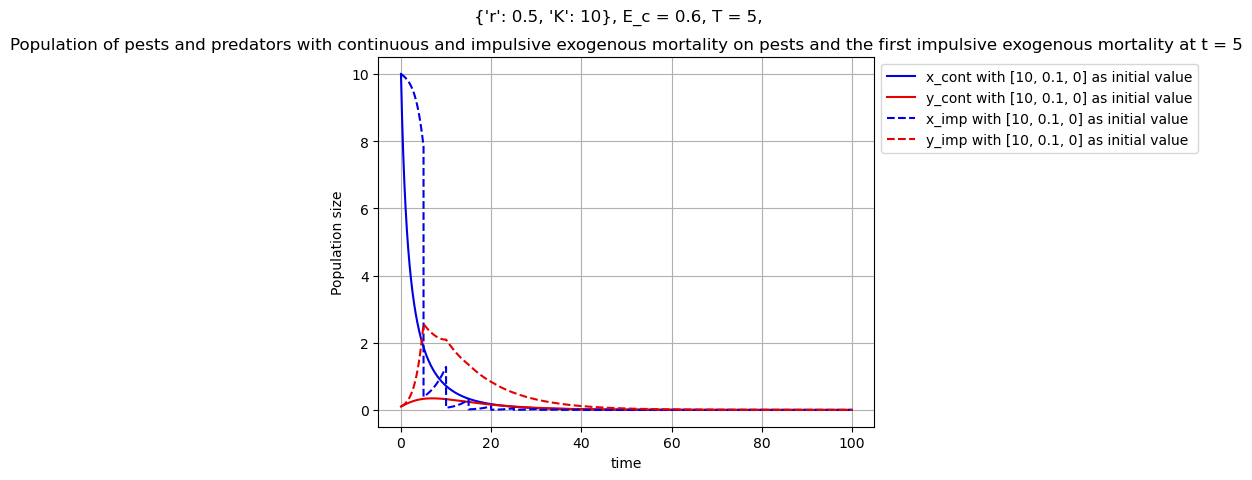

{'T': 5,
 'I_cont_final': 32.233491452521854,
 'I_imp_final': 51.74239973433285,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': 46.25,
 't_eta_imp': 35.0,
 't_eta_imp - t_eta_cont': -11.25}

In [8]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp = xyI0,
    xyI0_cont = xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps=0.01,
    plot_population=True
)

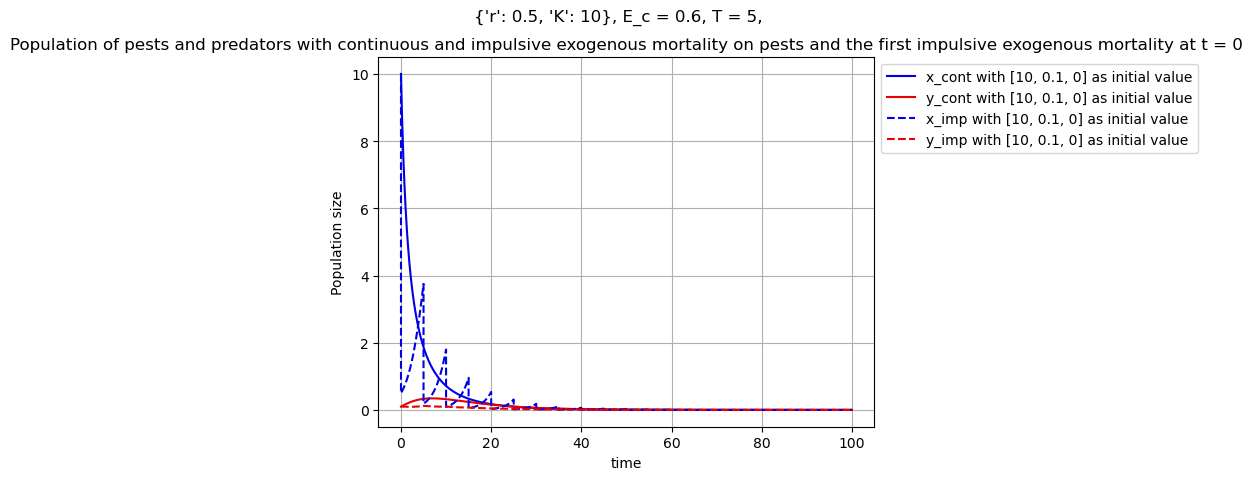

{'T': 5,
 'I_cont_final': 32.233491452521854,
 'I_imp_final': 16.582298948806628,
 'eps': 0.01,
 't_pulse': 0,
 't_eta_cont': 46.25,
 't_eta_imp': 55.0,
 't_eta_imp - t_eta_cont': 8.75}

In [9]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp = xyI0,
    xyI0_cont = xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=0,
    eps=0.01,
    plot_population=True
)

By comparing the two extreme cases for the impulsive model, it seems that the pests are eradicated faster when the time of first impulsion is $T$ than $0$. In parallel, at this case, the dynamic of predators is higher. The predators have enough preys before the first impulsion to grow.

## 2.2 Comparison graph 

### 2.2.1 $t_{\eta}$ with respect to $\epsilon$

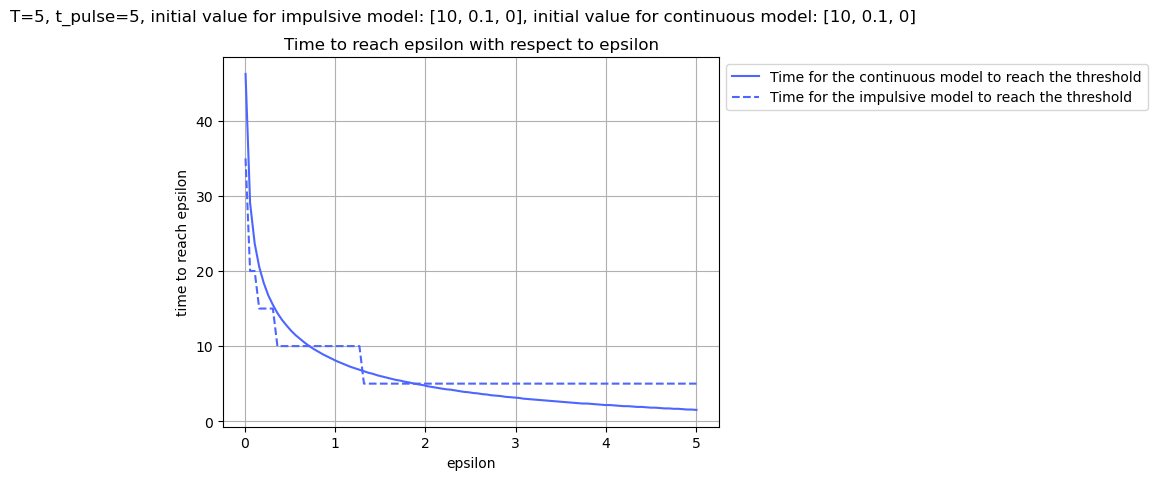

In [10]:
double_exo.plot_t_eta_of_eps_prop_mortality_on_x(
    xyI0_imp= xyI0,
    xyI0_cont= xyI0, #Same initial value
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps_start=0.01,
    eps_stop=5
)

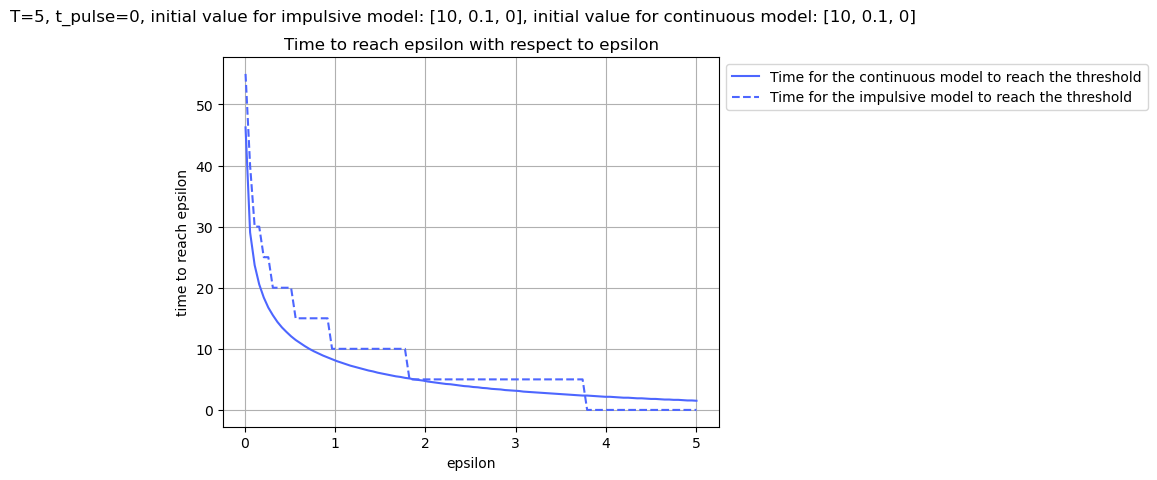

In [11]:
double_exo.plot_t_eta_of_eps_prop_mortality_on_x(
    xyI0_imp= xyI0,
    xyI0_cont= xyI0, #Same initial value
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=0,
    eps_start=0.01,
    eps_stop=5
)

Interpretation:  
No more just a delay because there is an intrinsic dynamic due to predators that doesn't make the prey size stay at $K$.  
The minimum $t_{\eta}$ is $t_pulse$ because the intrinsic dynamic doesn't have the time to reach epsilon.  
Interpret which method is better.  
Same interpretation about the constant part that are multiple of $T$.

### 2.2.2 Difference between impulsive $t_{\eta}$ and continuous $t_{\eta}$ with respect to $t_{pulse}$

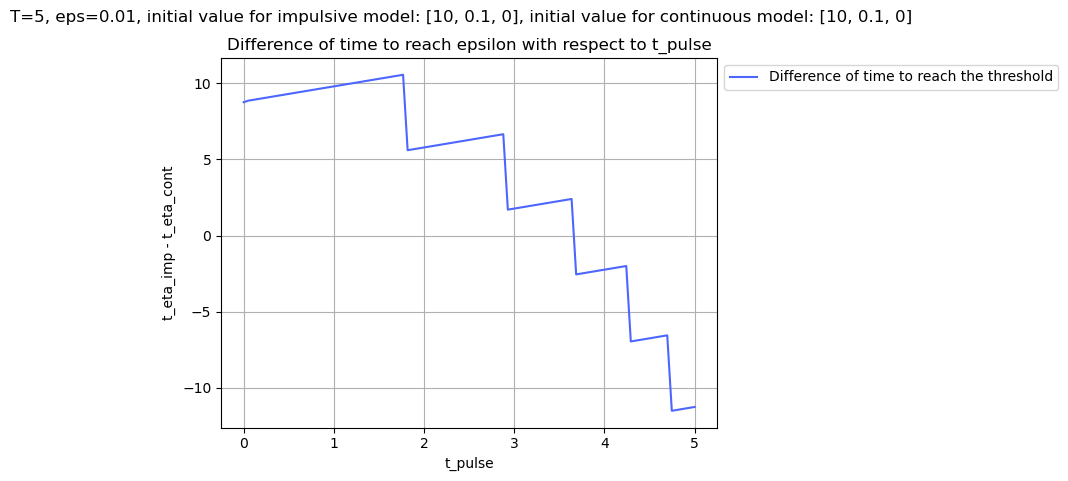

In [12]:
double_exo.plot_diff_t_eta_of_t_pulse_prop_mortality_on_x(
    xyI0_cont=xyI0,
    xyI0_imp=xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01
)

A positive difference means that the continuous model takes less time to reach $\epsilon$ (it is better).  
The continuous model is not affected by the time of the first pulse because it does not involve an impulsive part.    
As excpeted with the simulations for the extreme values, the impulsive model is better if the time of first pulse is at the end of the period. It allows the predators to grow because they still have enough amount of food. If the first pulse occurs too soon, the population of pests decreases too soon and the predators are too few to reduce the pests population.

### 2.2.3 Difference between impulsive $t_{\eta}$ and continuous $t_{\eta}$ with respect to $T$ and $\frac{t_{pulse}}{T}$

Let's give this difference the notation $\Delta t_{\eta}$

In the folllowing, let's call $x_{imp}$ the pest population for the impulsive model and $x_{cont}$ the pest population for the continuous model.

$T$ from $1$ to $50$

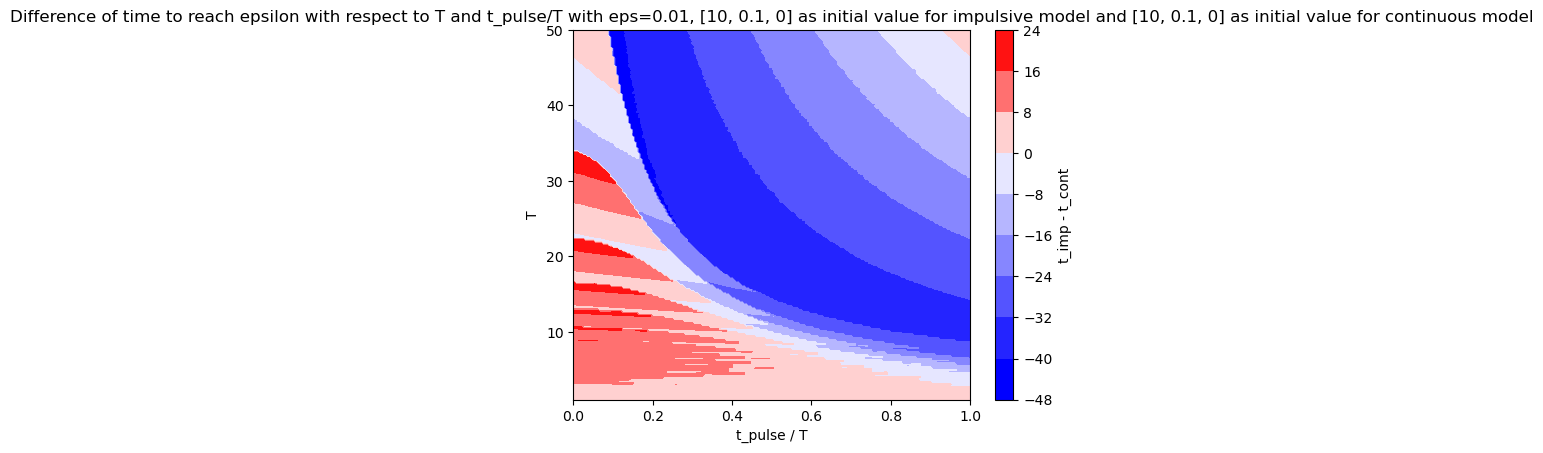

In [36]:
double_exo.plot_t_eta_contour_from_t_pulse_over_T_and_T_prop_mortality_on_x(
    xyI0_imp=xyI0,
    xyI0_cont=xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    T_start=1,
    T_stop=50,
    T_num=200,
    t_pulse_over_T_num= 201,
    plot_function='contourf'
)
#contourf 200*200 : 5 minutes
#contourf 100*100 : 1 minute

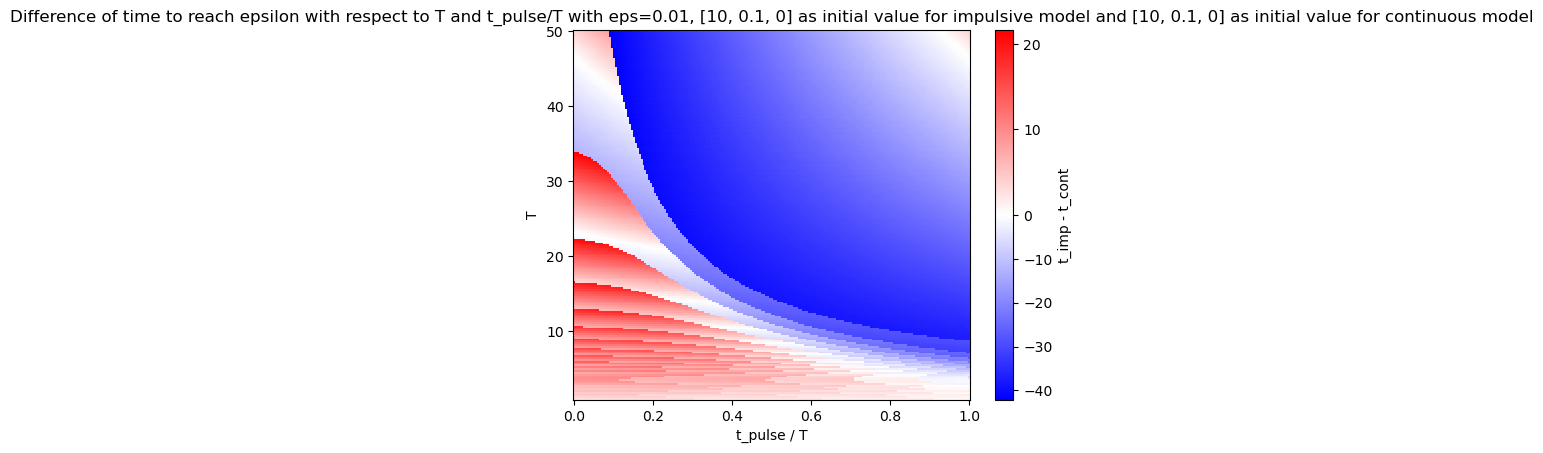

In [37]:
double_exo.plot_t_eta_contour_from_t_pulse_over_T_and_T_prop_mortality_on_x(
    xyI0_imp=xyI0,
    xyI0_cont=xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    T_start=1,
    T_stop=50,
    T_num=200,
    t_pulse_over_T_num= 201,
    plot_function='pcolormesh'
)
#pcolormesh 200 * 200 : 5 minutes

If the period is long enough ($>10$), the impulsive model outperforms the continuous one when the impulse is at the end of the period.  
The longer the period is, the sooner the "bound/threshold" of the time of first impulse is.  
But waiting too long for the first impulse decrease the outperformance of the impulsive model.  
For period with a length close to $50$ and the first impulse at the end of the period, the continuous model even slightly ouperforms the impulsive one because the dynamic of $x_{imp}$ is like a dynamic of a model without exogenous mortality until the first impulse. Meanwhile, $x_{cont}$ already reached $\epsilon$.

There seem to be clear bounds with high difference of $\Delta t_{\eta}$.  
From smaller to bigger $\frac{t_{pulse}}{T}$, it is due to the pulse that kill drastically the pests, that reach immediately $\epsilon$.  
From bigger to smaller $T$ when $\frac{t_{pulse}}{T} < \sim 0.15$, the first pulse doesn't kill the pests enough to make them reach $\epsilon$. That gives them the time to grow again above $\epsilon$.

$T$ from $1$ to $20$

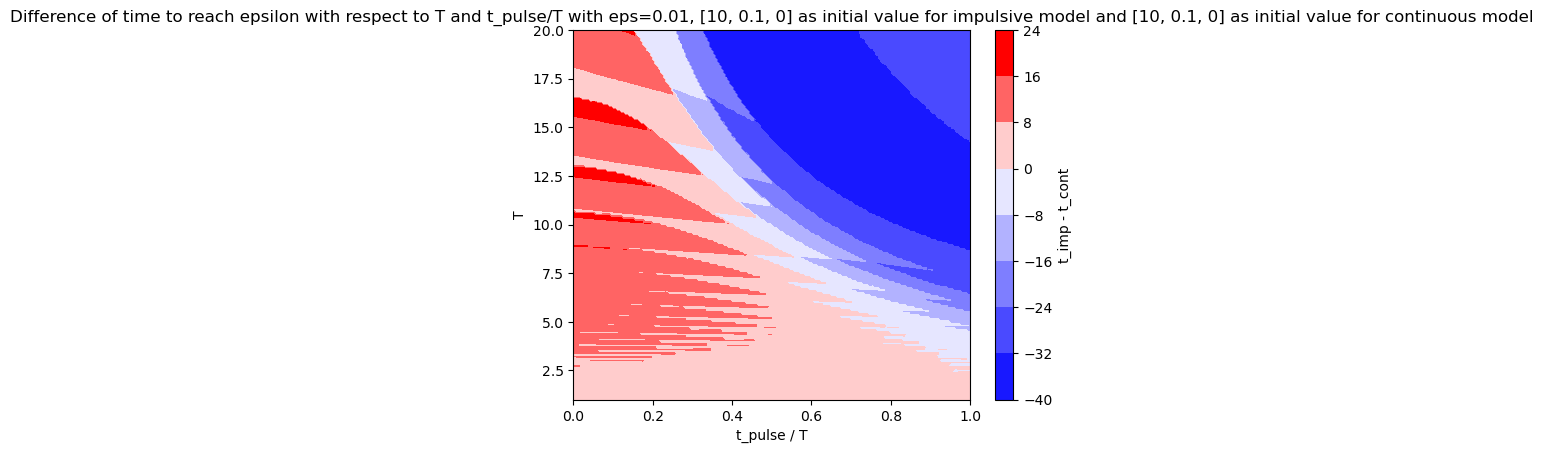

In [38]:
double_exo.plot_t_eta_contour_from_t_pulse_over_T_and_T_prop_mortality_on_x(
    xyI0_imp=xyI0,
    xyI0_cont=xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    T_start=1,
    T_stop=20,
    T_num=200,
    t_pulse_over_T_num= 201,
    plot_function='contourf'
)
#contourf 200*200 : 9 minutes

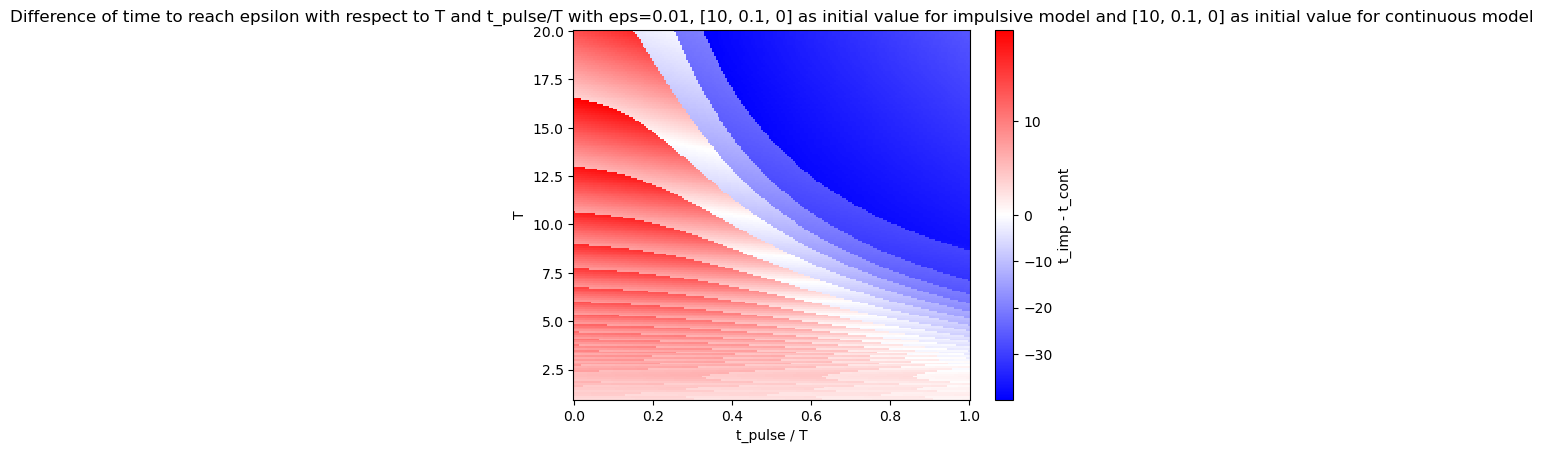

In [39]:
double_exo.plot_t_eta_contour_from_t_pulse_over_T_and_T_prop_mortality_on_x(
    xyI0_imp=xyI0,
    xyI0_cont=xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    T_start=1,
    T_stop=20,
    T_num=200,
    t_pulse_over_T_num= 201,
    plot_function='pcolormesh'
)
#pcolormesh 200 * 200 : 9 minutes

$T$ from $0.1$ to $5$

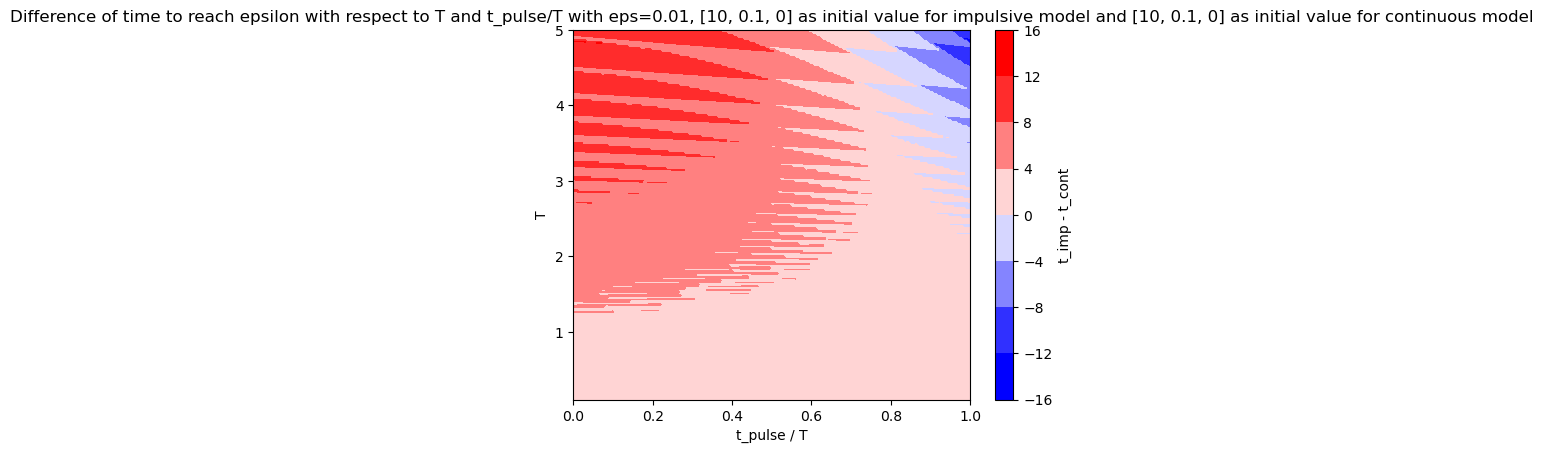

In [40]:
double_exo.plot_t_eta_contour_from_t_pulse_over_T_and_T_prop_mortality_on_x(
    xyI0_imp=xyI0,
    xyI0_cont=xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    T_start=0.1,
    T_stop=5,
    T_num=200,
    t_pulse_over_T_num= 201,
    plot_function='contourf'
)
#contourf 200*200 : 51 minutes
#contourf 100*100 : 14 minutes

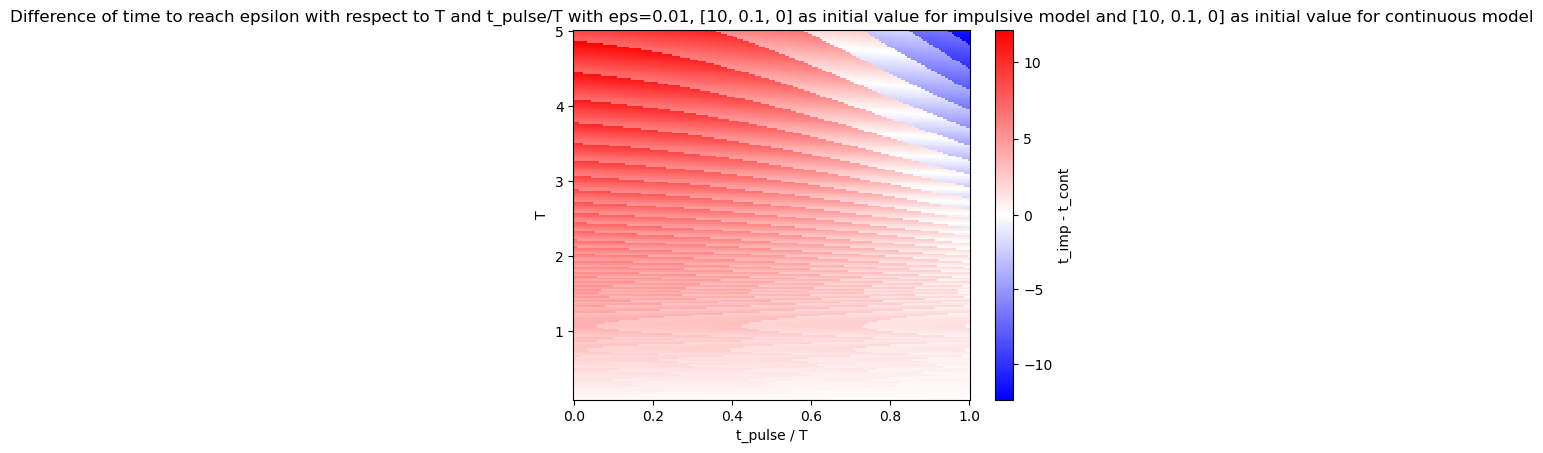

In [41]:
double_exo.plot_t_eta_contour_from_t_pulse_over_T_and_T_prop_mortality_on_x(
    xyI0_imp=xyI0,
    xyI0_cont=xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    T_start=0.1,
    T_stop=5,
    T_num=200,
    t_pulse_over_T_num= 201,
    plot_function='pcolormesh'
)
#pcolormesh 200 * 200 : 51 minutes


$\Delta t_{\eta}$ is close to $0$ or slightly positive for small values of $T$. The impulsive model tends to the continuous one when $T$ tends to $0$. The continuous model performs anyway slightly better with small $T$ because $x$ in the continuous model is decreasing when $E>r$ ($\dot{x} < 0$) while $x$ in the impulsive model can a piecewise increasing function. With a small $T$, when $x_{cont}$ is already below $\epsilon$, $x_{imp}$ is still increasing before the next impulsion. That creates a delay. 

### 2.2.4 Difference between impulsive $t_{\eta}$ and continuous $t_{\eta}$ with respect to $T$ and $t_{pulse}$

In the following plots, the highest value of $T$ will also be the highest value of $t_{pulse}$

##### To $50$

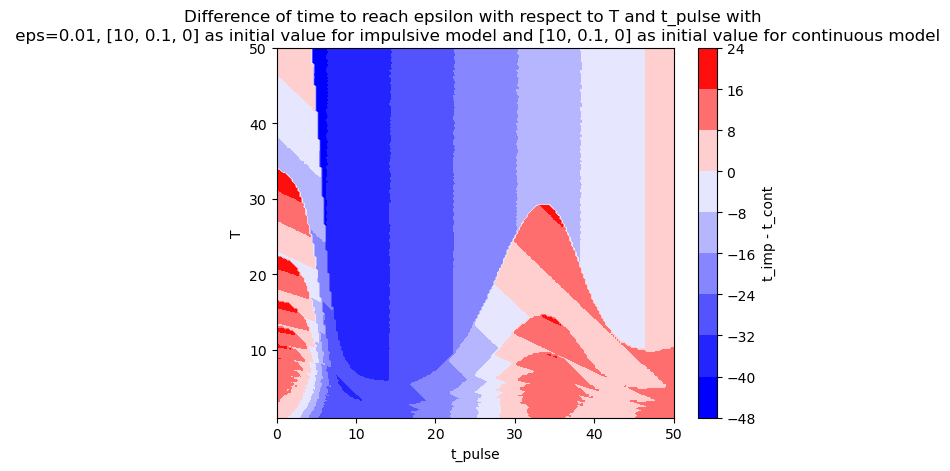

In [44]:
double_exo.plot_t_eta_contour_from_t_pulse_and_T_prop_mortality_on_x(
    xyI0_imp=xyI0,
    xyI0_cont=xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    T_start=1,
    T_stop=50,
    T_num=200,
    t_pulse_start=0,
    t_pulse_stop=50,
    t_pulse_num= 201,
    plot_function='contourf'
)

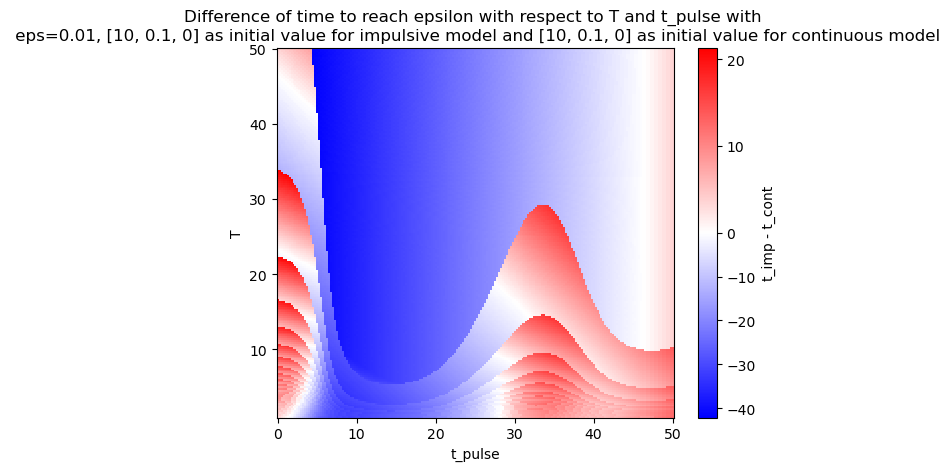

In [45]:
double_exo.plot_t_eta_contour_from_t_pulse_and_T_prop_mortality_on_x(
    xyI0_imp=xyI0,
    xyI0_cont=xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    T_start=1,
    T_stop=50,
    T_num=200,
    t_pulse_start=0,
    t_pulse_stop=50,
    t_pulse_num= 201,
    plot_function='pcolormesh'
)

For any $T$, the optimal $t_{pulse}$ seems to be around $7$ and $10$.  
Waiting until more than $30$ for the first impulse seems to be non optimal.

##### To $20$

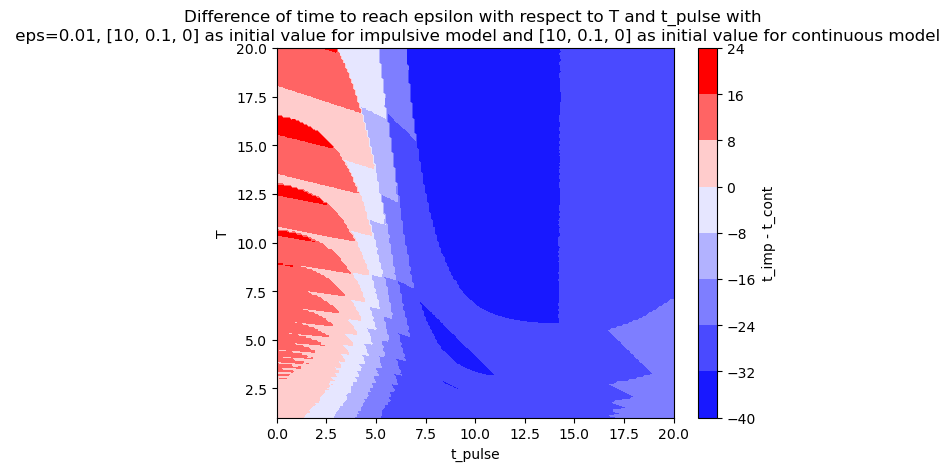

In [46]:
double_exo.plot_t_eta_contour_from_t_pulse_and_T_prop_mortality_on_x(
    xyI0_imp=xyI0,
    xyI0_cont=xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    T_start=1,
    T_stop=20,
    T_num=200,
    t_pulse_start=0,
    t_pulse_stop=20,
    t_pulse_num= 201,
    plot_function='contourf'
)

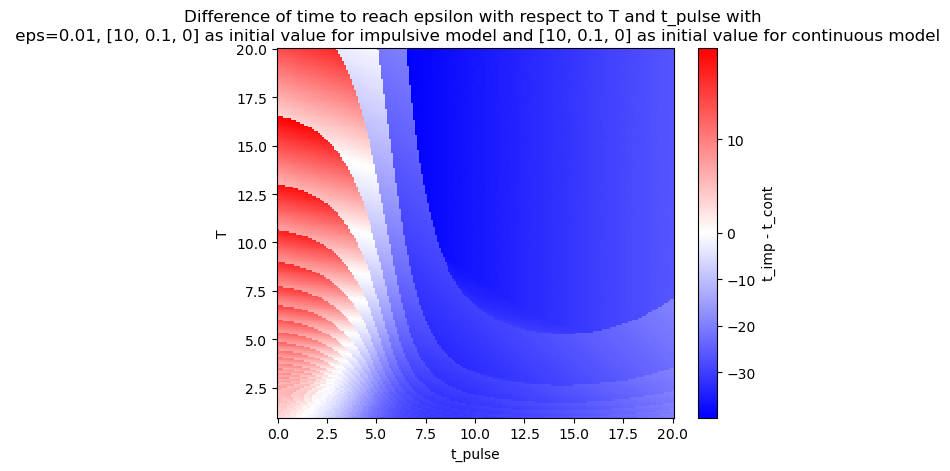

In [47]:
double_exo.plot_t_eta_contour_from_t_pulse_and_T_prop_mortality_on_x(
    xyI0_imp=xyI0,
    xyI0_cont=xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    T_start=1,
    T_stop=20,
    T_num=200,
    t_pulse_start=0,
    t_pulse_stop=20,
    t_pulse_num= 201,
    plot_function='pcolormesh'
)

As viewed previously, the optimal time of first pulse for any period length is between $7.5$ and $10$.

##### To $5$

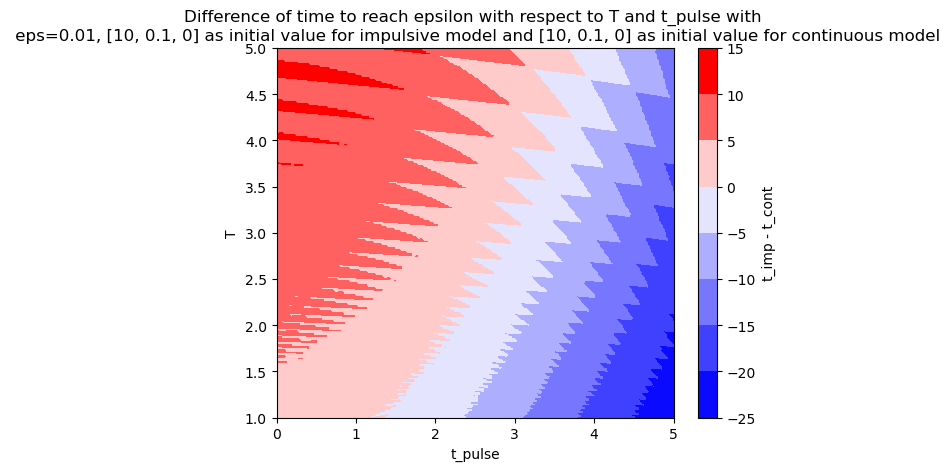

In [48]:
double_exo.plot_t_eta_contour_from_t_pulse_and_T_prop_mortality_on_x(
    xyI0_imp=xyI0,
    xyI0_cont=xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    T_start=1,
    T_stop=5,
    T_num=200,
    t_pulse_start=0,
    t_pulse_stop=5,
    t_pulse_num= 201,
    plot_function='contourf'
)

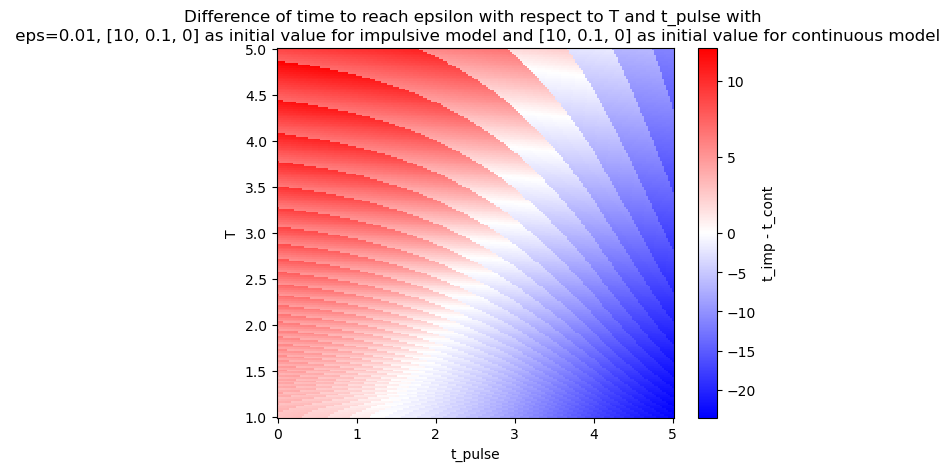

In [49]:
double_exo.plot_t_eta_contour_from_t_pulse_and_T_prop_mortality_on_x(
    xyI0_imp=xyI0,
    xyI0_cont=xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    T_start=1,
    T_stop=5,
    T_num=200,
    t_pulse_start=0,
    t_pulse_stop=5,
    t_pulse_num= 201,
    plot_function='pcolormesh'
)

For small time periods, it is always better to wait until $5$ for the first time pulse.  
This graph may not be complete, because the two previous observations. If the $t_{pulse}$ axis is extended, the optimal $t_{pulse}$ might be around $7$ and $10$ again.